Homework 1 — (15 points)
======
### What to hand in
1. A Jupyter notebook containing all code and output (figures and audio). I should be able to evaluate the file to reproduce all output. 
1. Any other data that we tell you to save to a file (e.g. audio files).

### How to hand it in
1. Compress all of the files specified into a .zip file. 
1. Name the file in the following manner, firstname_lastname_hw1.zip. For example, Bryan_Pardo_hw1.zip. 
1. Submit this .zip file via Canvas

## Run this code block 1st, to import likely needed packages

In [1]:
# This line imports most packages you'll need. You may need to import others (eg random and cmath)
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa, cmath, math, time
from IPython.display import Audio

# This line makes sure your plots happen IN the webpage you're building, instead of in separate windows.
%matplotlib inline

## Questions

#### 1. (one point) Go out on the web and read about the early history of audio recording. Thomas Edison, Alexandar Graham Bell,  Édouard-Léon Scott de Martinville and Valdemar Poulsen are all big names in the history of audio recording. Give a brief overview (no more than two sentences) for each of these people on what that person contributed to audio recording.

Édouard-Léon Scott de Martinville invented the phonautograph. This device recorded sound waves, but didn't play them back - it was useful for representing the sound waves visually.

Thomas Edison invented the phonograph in 1877, which could record sound and play it back. Initially the phonograph recorded the audio signals on a sheet of tinfoil wrapped around a metal cylinder, but later employed the use of a hollow wax cylinder.

Alexandar Graham Bell is of course famous for the first version of the telephone, which translated sound waves into electrical currents which could be transmitted and then translated back into an audio signal. He also made significant improvements on the phonograph.

Valdemar Poulsen created the telegraphone, a magnetic wire recorder. Magnetic wire recording was the predecessor to magnetic tape recording.

#### 2. (one point)  The sample rate of telephone audio (8 kHz) and CD quality audio (44.1 kHz) are very different. Explain what effect this difference in sample rate has on the ability of a recorder to reproduce sound and why the sample rate of CD audio is what it is. 

The sample rate determines how close your reconstructed signal will be to the original signal. A recording made with a lower sample rate will miss parts of the original signal, and the reproduced sound will potentially be distorted and innacurate compared to the original. Telophone audio is sampled at a low rate and thus the differences between the original signal and the telephone's audio are easily identifiable.

CDs sample at 44.1 kHz, which is a little more than twice the frequency of the highest frequency that good human ears can hear (around 20 kHz). We choose a number slightly larger than twice the highest frequency we want to represent because this guarantees that we'll capture waves of the highest frequency we wish to hear. This sample rate is generally known as the Nyquist frequency (over twice the frequency of the highest frequency you want to represent).

#### Sample rate isn't the only difference between CD and telephone audio. Express in dB the difference in dynamic range between 8 bit audio (telephone quality) and 16 bit audio (CD quality).  How many bits would one need to exceed the dynamic range of human hearing? Show you work.

The difference in dynamic range between 8 bit audio and 16 bit audio is 48.16 dB. The number of bits needed to exceed the dynamic range of human hearing is about 20 bits. (Work below)

In [2]:
db = 20*math.log((2**16)/(2**8), 10)
print "Difference in dynamic range between 8 bit audio and 16 bit audio:", db

human_dynamic_range = 120
bits = math.log(10**(human_dynamic_range/20), 2)
print "Number of bits needed to exceed the dynamic range of human hearing:", bits

Difference in dynamic range between 8 bit audio and 16 bit audio: 48.1647993062
Number of bits needed to exceed the dynamic range of human hearing: 19.9315685693


#### 3. (one point) Make a function to generate sinewaves. Test the function for a simple case (e.g. a sinewave of frequency 10 Hz and length 1 sec, sampled at a rate of 100 Hz). Write a function to plot an audio signal and use it to display the generated sinewave (you can write your own plotting function or use the "plot_audio" function provided in the previous homework). Label the figure's axes appropriately.


In [3]:
def make_sinewave(f, t, sr):
    """    
    Parameters
    ----------
    f:  float
        Frequency of sine wave
    t:  float
        Duration in seconds
    sr: int
        Sample rate
    
    Returns
    -------
    np.ndarray 
        Array of floats containing the signal
    """
    samples = np.arange(0, t*sr)/sr
    
    x = np.sin(2*np.pi*f*samples)
    return x
    
def plot_audio(x, sr, figsize=(16,4)):
    """
    A simple audio plotting function
    
    Parameters
    ----------
    x: np.ndarray
        Audio signal to plot
    sr: int
        Sample rate
    figsize: tuple
        A duple representing the figure size (xdim,ydim)
    """
    length = float(x.shape[0]) / sr
    t = np.linspace(0,length,x.shape[0])
    plt.figure(figsize=figsize)
    plt.plot(t, x)
    plt.ylabel('Amplitude')
    plt.xlabel('Time (s)')
    plt.show()

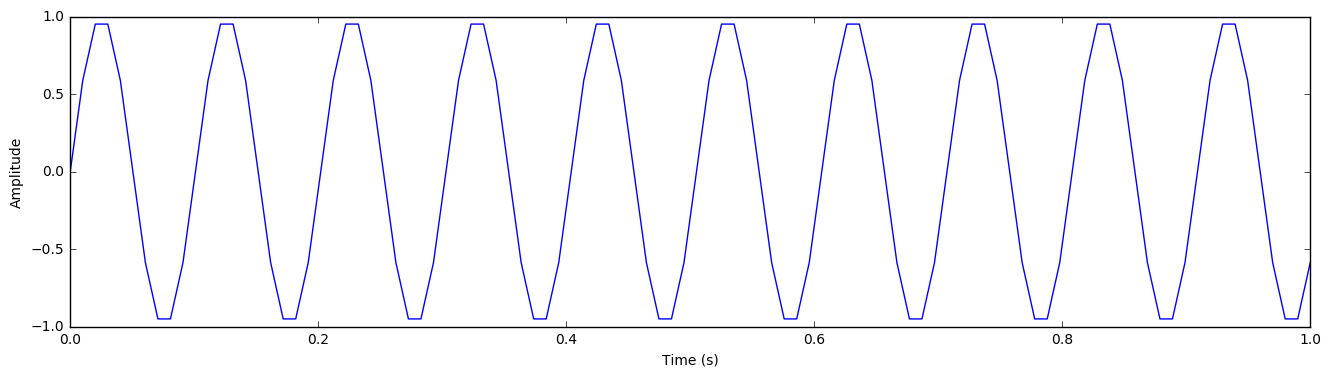

In [4]:
sr = 100.
x = make_sinewave(10., 1., sr)
plot_audio(x, sr)

#### 4. (one point) What 3 pitch classes are in a C major triad? Make a C major triad out of sine waves that is in the same octave as A440 (i.e. starting on the C below A440). Display the waveform and play it.

The 3 pitch classes that make up a C major triad are C, E, and G.

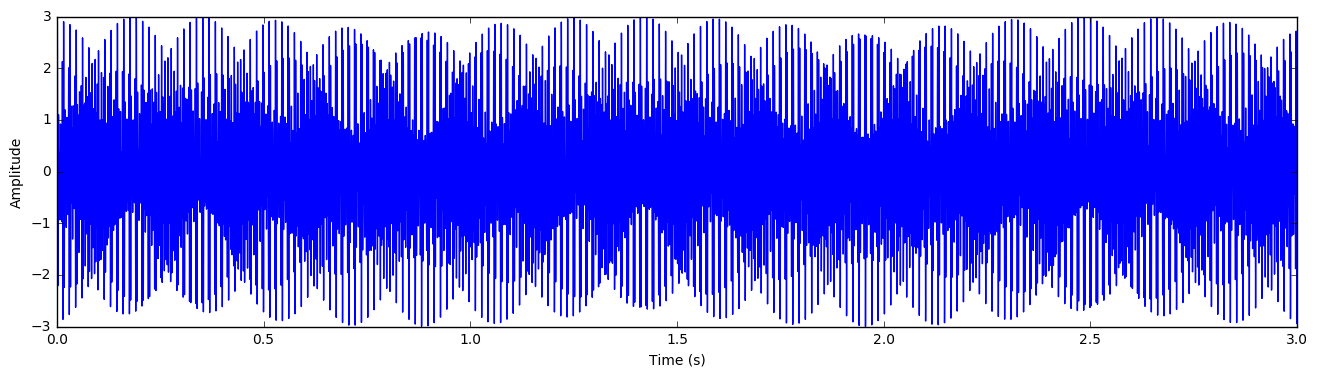

In [5]:
sr = 44100.
length = 3.
c = make_sinewave(261.63, length, sr)
e = make_sinewave(329.63, length, sr)
g = make_sinewave(392.00, length, sr)
triad = c + e + g
plot_audio(triad, sr)
Audio(triad, rate=sr)

#### 5. (one point) Implement a simple function to express the Root Mean Squared Amplitude of a signal encoded as an array, in dB, with respect to a reference value (review the lecture on amplitude, slides no. 5-8).

In [6]:
def rms_db(signal, reference):
    '''
    Parameters
    ----------
    signal:  np.ndarray 
        Array of floats containing the signal
    reference:  float
        A reference amplitude to compare to 

    Returns
    -------
    float
        a value in dB, given the reference value
    '''
    sum = 0
    for x in signal:
        sum += x**2
    rms = math.sqrt(sum/len(signal))
    db = 20*math.log10(rms/reference)
    return db

#### 6. (one point) Make a signal.  Vary its volume and find out for yourself how many dB different sounds have to be, before you can tell the volume is different?  Play identical pairs, where the only difference between them is the amplitude. Start with 0 db difference, and grow the difference until you can reliably tell them apart.   Oh...and do this in a quiet room with headphones on. This won't work at all on your laptop speakers or in a loud room.

I can reliably tell the difference between signals which are 0.827853703164 dB apart.


In [7]:
#write your code to make repeated pairs of audio that vary by differing dB amounts here.
def multiply_amplitude(signal, f):
    '''
    Parameters
    ----------
    signal: np.ndarray
        Array of floats containing the signal
    f: float
        Factor which amplitude of signal will be multiplied by
        
    Returns
    -------
    np.ndarray
        signal with modified amplitude
    float
        number of deciBels apart the new signal is from the original signal
    '''
    new_signal = [f * s for s in signal]
    db_orig = rms_db(signal, 1.)
    db_new = rms_db(new_signal, 1.)
    db_diff = db_new - db_orig
    return new_signal, db_diff

louder_triad, dB = multiply_amplitude(triad, 1.1)
print "deciBel difference:", dB
x = np.concatenate((triad, np.zeros(20000), louder_triad))
Audio(x, rate=sr)

deciBel difference: 0.827853703164


#### 7. (one point) Implement a Fourier transform function and an inverse Fourier transform function using the formulae from the course lecture notes.

In [8]:
def fourier_transform(x):
    """ 
    Performs a Fourier transform
    
    Parameters
    ----------
    x: np.ndarray 
        Array of real or complex values containing the signal
    
    Returns
    -------
    np.ndarray 
        Array of complex vaules containing the signal
    """
    N = len(x)
    X = np.zeros(N, dtype=np.complex_)
    for k in range(N):
        sum = 0
        for n in range(N):
            val = x[n] * cmath.exp(-2*np.pi*1j*k*n/N)
            sum += val
        X[k] = sum
    return X

In [9]:
def inverse_fourier_transform(X):
    """ 
    Performs an inverse Fourier transform
    
    Parameters
    ----------
    x: np.ndarray 
        Array of  complex values containing the signal
    
    Return
    ------
    np.ndarray 
        Array of complex vaules containing the signal
    """
    N = len(X)
    x = np.zeros(N, dtype=np.complex_)
    for n in range(N):
        sum = 0
        for k in range(N):
            val = X[k] * cmath.exp(2*np.pi*1j*k*n/N)
            sum += val
        x[n] = sum/N
    return x

#### 8. (one point) Write code to test that these functions work properly. Be sure to explain why you think your test is a good one.

The tests below are thorough. Initially, we create a simple signal, a C4. We use our fourier_transform function to get the DFT of the signal and plot it. The frequencies represented in the plot are what we would expect from the DFT of a signal consisting only of a sine wave at 261.63 Hz - it has one strong frequency represented around 261 Hz. Notice that we also get a peak around 3750 Hz. This is to be expected because of the symmetric nature of the DFT. We then use our inverse_fourier_transform function to get the IDFT of the DFT and plot the results. The IDFT signal looks exactly the same as the original C4 signal and sounds exactly the same. From this, we can safely conclude that fourier_transform and inverse_fourier_transform are behaving as expected.


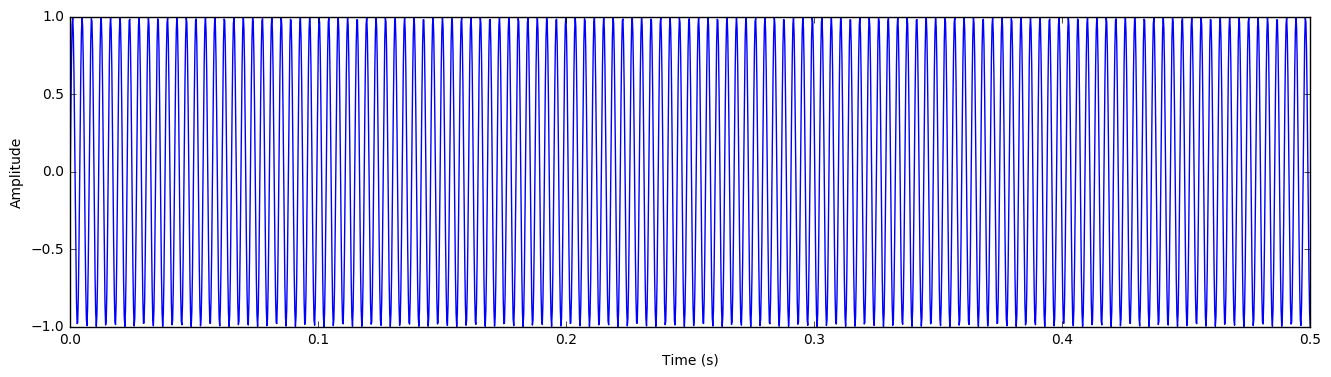

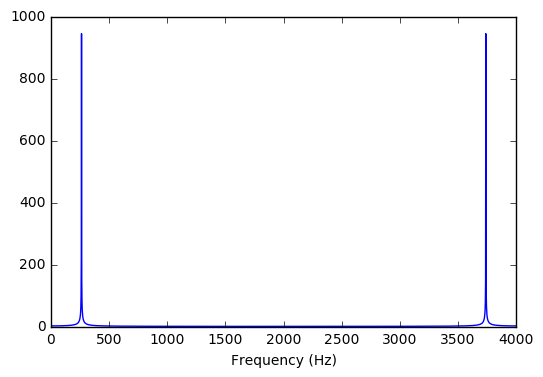

/home/mattniemer/miniconda2/envs/eecs352/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


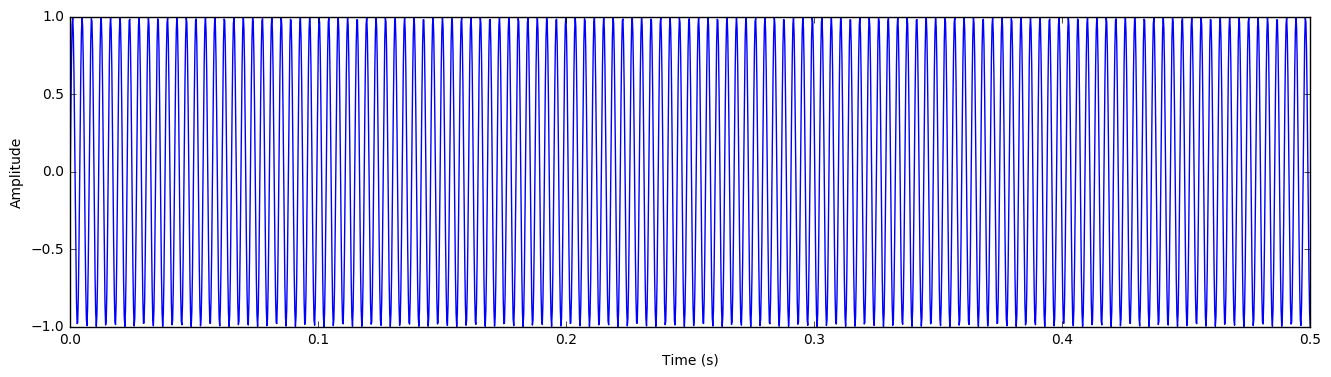

/home/mattniemer/miniconda2/envs/eecs352/lib/python2.7/site-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [10]:
# Write your code to check here. 
#  Be sure to explain in your comments how this test confirms the correctness.
# NOTE: 2 things *I* would test are (1) if I take the Fourier transform of a signal, 
# and then take its output as the input to the inverse Fourier transform, does the 
# result look like the original signal?  and (2) If I look at the result of the 
# Fourier transform, do I see a pattern of energy that I would expect to see, given
# what the input signal contains?

# create the original signal (C4)
sr = 4000.
length = .5
c = make_sinewave(261.63, length, sr)
plot_audio(c, sr)

# compute the DFT of the original signal and plot it... 
# do we see the frequencies represented that we expect?
dft = fourier_transform(c)
x_freq = np.linspace(0.0, sr, num=len(dft))
plt.plot(x_freq, np.abs(dft))
plt.xlabel('Frequency (Hz)')
plt.show()

# comppute the IDFT of the DFT and plot it... does it look the same as the original signal?
c_idft = inverse_fourier_transform(dft)
plot_audio(c_idft, sr)

# listen to the original signal and the IDFT of DFT signal back to back...
# do they sound the same?
x = np.concatenate((c, np.zeros(1000), c_idft))
Audio(x, rate=sr)

From this point on, you will use the fft and ifft functions from scipy, as they are much faster than the code you just wrote. See the following link for documentation on them. 
http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html


Hint: https://docs.python.org/2/library/timeit.html and https://docs.python.org/2/library/time.html  are useful for the following problem.
            

#### 9. (one point) What is the computational complexity of the Fourier Transform  code you built? What is the computational complexity of the Fast Fourier Transform (FFT)? Illustrate the difference in running time by measuring how long it takes your fourier_transform code on signals of different length and plot the time to completion (vertical axis) as a function of the number of samples (horizontal axis). Compare that on the same graph to how long it took on the same number of samples with the python FFT. Do these time numbers back up the computational complexity?

The fourier_transform and inverse_fourier_transform methods that I wrote have a time complexity of O(n^2). The time complexity of FFT is O(nlog(n)), which is much faster. The time numbers absolutely back up this difference in computational complexity - the curve for DFT exhibits the steep n^2 shape while the FFT curve is nice and flat, exactly what we would expect from a function which has time complexity O(nlog(n)) It's a little hard to see the exact shape of the FFT curve because we're comparing it to DFT's time complexity, but the printed times back up the O(nlog(n)) time complexity, even if we can't see it in the graph. (The first couple of FFT completion times are a little warped but the trend is revealed later on in the sequence).

FFT completion times
0.000113964080811
0.000104904174805
8.70227813721e-05
8.79764556885e-05
0.000126123428345
9.17911529541e-05
0.000159978866577
0.000241041183472
0.00040602684021
0.000745058059692

DFT completion times
0.0017728805542
0.003014087677
0.0134389400482
0.0491089820862
0.196522951126
0.767666101456
2.68182015419
10.5372338295
43.7131848335
170.996656179


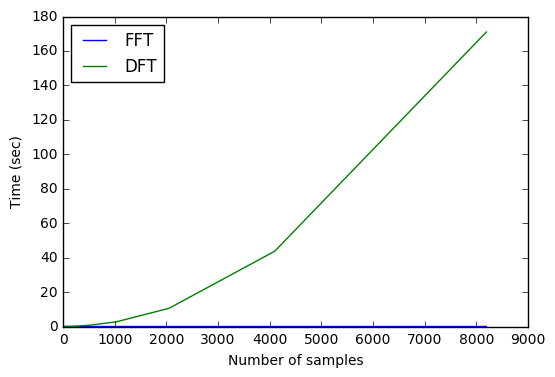

In [11]:
# Write your code to test the timing of the two approaches here.
sr = 16.
c_arr = np.empty(10, dtype=np.ndarray)
i = 0
for i in range(10):
    c_arr[i] = make_sinewave(261.63, 1.*(2**i), sr)

print 'FFT completion times'
fft_time_arr = np.empty(10)
i = 0
for c in c_arr:
    t_i = time.time()
    fft = sp.fft(c)
    t_f = time.time()
    print t_f - t_i
    fft_time_arr[i] = t_f - t_i
    i += 1    

print '\nDFT completion times'
dft_time_arr = np.empty(10)
i = 0
for c in c_arr:
    t_i = time.time()
    dft = fourier_transform(c)
    t_f = time.time()
    print t_f - t_i
    dft_time_arr[i] = t_f - t_i
    i += 1
    
num_samples = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
plt.plot(num_samples, fft_time_arr, label="FFT")
plt.plot(num_samples, dft_time_arr, label="DFT")
plt.xlabel('Number of samples')
plt.ylabel('Time (sec)')
plt.legend(loc='upper left')
plt.show()

#### 10. (one point) The choice of windowing function for your FFT is an important one. In this problem, we are going to investigate the effect of windowing on the spectra of sine waves. Write a function to compute the log-magnitude spectrum of a signal. Your function must receive the number of frequency samples as an input (there is an optional parameter in scipy's fft that lets you specify how many points the FFT has). 

#### Make an audio signal composed of 2 sine waves at 100 and 250 Hz. The sample rate should be 1000 Hz. Now compute the spectrum of the signal using a rectangular window of length 64 samples. In this part we set the number of FFT points to the same value as the window length. Then compute the spectrum using a a Hann window (from scipy.signal). Plot both spectra on the same axis. Compare the two plots. Be sure to label the frequency dimension correctly (horizontal = frequency in Hz) with the correct units. Be sure to label your two lines so we can tell which is which.

#### Which approach do you think gives a more accurate visualization of the signal contents, windowing the signal with a rectangular window or with a Hann window? Which one looks more accurate? What is the underlying reason? 

Windowing the signal with a Hann window is more accurate than windowing with a rectangular signal. The signal which is windowed with a rectangle seems to indicate that the signal contains significant waves with frequencies close to  100Hz and 250Hz, which is not the case - we know that the signal is only composed of two sine waves at 100Hz and 200Hz. The Hann window reflects this better - we see the spectrum dip quickly after peaking at 100Hz and 250Hz. We can get a better idea that the signal is only made up of our 2 sine waves at 100Hz and 250Hz. The underlying reason for this is because we apply a windowing funciton, we are reducing the significance of the signal at the boundaries of the window, and thus supressing undesireable parts of the signal.

In [12]:
def audio_spectrum(sig, win_len, win_type, Nfft):
    """
    Computes the spectrum of the first win_len samples of an audio signal
    
    Parameters
    ----------
    sig: np.ndarray
        Audio signal 
    win_len: int
        Length of the portion of the signal for which we calclate the spectrum(in samples).
        This should range between 1 and the length of sig.
    win_type: string
        Determines the window type including 'rectangular' and 'hann'
    Nfft: int
        Number of fft points (if Nfft is greater than win_len the fft function would zero pad the 
        windowed signal, if Nfft is smaller than win_len the "audio_spectrum funtion must generate 
        an error message)     
    """
    if Nfft < win_len:
        print "Nfft must be larger than win_len"
        return
    
    if win_type == 'rectangular':
        fft = sp.fft(sig[0:win_len], Nfft)
        
    elif win_type =='hann':
        hann = sp.signal.hann(win_len)
        fft = sp.fft(sig[0:win_len]*hann, Nfft)
    
    else:
        print "Not a valid window type"
        return
    
    fft = 20*np.log10(np.abs(fft))
    return fft

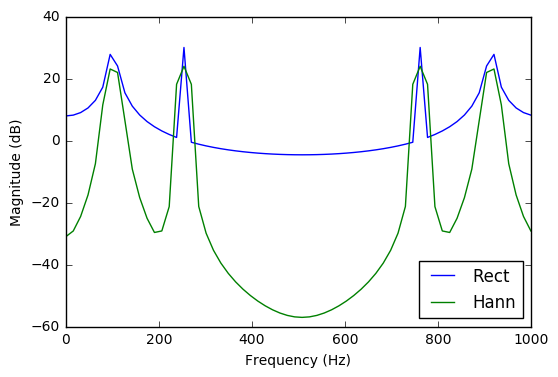

In [13]:
#Write your code for the harmonic sound here
sr = 1000
sig = make_sinewave(100, 1., sr) + make_sinewave(250, 1., sr)

rect = audio_spectrum(sig, 64, 'rectangular', 64)
hann = audio_spectrum(sig, 64, 'hann', 64)

x_freq = np.linspace(0.0, sr, num = 64)
plt.plot(x_freq, rect, label="Rect")
plt.plot(x_freq, hann, label="Hann")
plt.legend(loc='lower right')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')

plt.show()

#### 11. (one point)  Now, do everything exactly like you did in question 10....except increase the number of FFT points (Nfft) to 256 and then to 512 (the window length win_len stays the same). When you calculate a FFT with more points than are in the signal, zeros are added to the input signal and interpolation is performed on the output signal. In general, zero-padding in the time domain is equivalent to creating new analysis bins in between original bins in the frequency domain. This often gives us a more accurate view of the frequency content in the signal. What are some of differences you notice in these plot compared to the previous one and what do you think is the underlying reason? What stays the same and what changes between the three plots?

You can read more about the effect of zero-padding on the frequency-domain representation in the follwing pages:

http://www.dsprelated.com/freebooks/sasp/Zero_Padding_Time_Domain.html

http://dspguru.com/dsp/howtos/how-to-interpolate-in-time-domain-by-zero-padding-in-frequency-domain



The two new plots with more FFT points maintain the same general shape as the first plot, however, the two new plots are much different in that both curves oscillate a great deal, with more local peaks clearly defined at different frequencies in the signal. Because of the zero padding, we can see that the signal has "side lobes" surrounding the main lobes at 100Hz and 250Hz. In the original plot, we don't see any details about these side lobes. The main difference between the plot with 256 FFT points and the plot with 512 FFT points is that the latter's side lobes are even more pronounced. This happens because the as we zero-pad in the time domain, we cause the FFT to create more analysis bins than the original bins in the frequency domain. This leads FFT to interpolate on its output and allow us to see a more accurate view of the frequency content in the signal.

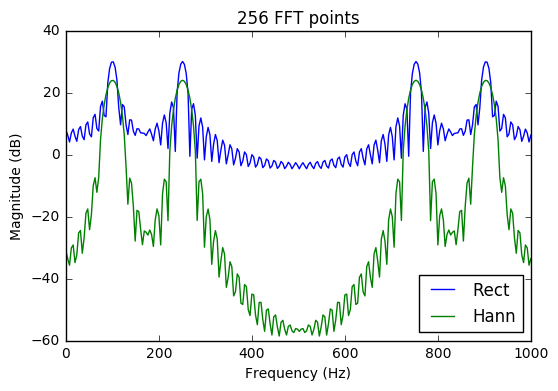

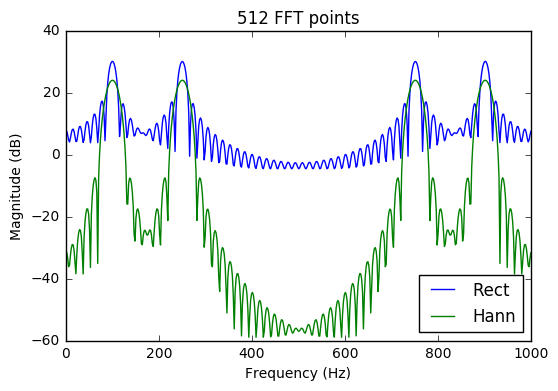

In [14]:
# write the code here
def plot_audio_spectrum(sig, sr, Nfft):
    rect = audio_spectrum(sig, 64, 'rectangular', Nfft)
    hann = audio_spectrum(sig, 64, 'hann', Nfft)

    x_freq = np.linspace(0.0, sr, num = Nfft)
    plt.plot(x_freq, rect, label="Rect")
    plt.plot(x_freq, hann, label="Hann")
    plt.legend(loc='lower right')

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    title = str(Nfft) + " FFT points"
    plt.title(title)
    
    plt.show()
    
sr = 1000
sig = make_sinewave(100, 1., sr) + make_sinewave(250, 1., sr)

plot_audio_spectrum(sig, sr, 256)
plot_audio_spectrum(sig, sr, 512)

#### 12. (one point) What is the pitch (in Hz) of the lowest note played by a well-tuned piano using equal temperment tuned at A440? What is the pitch (in Hz) of the highest note? Now, given these numbers, assume you're recording at 44100 Hz (CD quality audio). Give a window length (in samples) so that the spacing between frequency bins (and therefore the frequency of the lowest component you can represent) is low enough to capture the lowest note on the piano. 

The lowest pitch on a well-tuned piano using equal temperment tuned at A440 is 27.5Hz (A0). The highest pitch is 4186.01Hz (C8). If we want to capture 27.5Hz then we need to guarantee that our window will be longer than the period of that 27.5Hz sine wave. 44100(samples/sec) / 27.5(periods/sec) = 1603.63(samples/period). This means that if we make our window length longer than 1603.63 samples, then we'll definitely capture a period of a 27.5Hz sine wave. A window which is 1604 samples long should do the trick.

#### 13. (one point) The case of the missing fundamental is where a sound seems to have a pitch at frequency F0, but has no energy at this frequency.  Instead all the frequency is at integer multiples of F0. Build an audio example that illustrates the case of the missing fundamental: First play a harmonic sound with 10 harmonics (including F0).  Let's make it the C one octave below Middle C on the piano: 131 Hz. Then, successively remove each harmonic, starting from the lowest, to the highest (F0, then F1....etc). How many harmonics had to disappear before it sounded like the pitch changed?

Wow. I took out F0 through F3 before I could really tell a difference between the pitch. Even when the signal only consisted of F4 through F9 I was still hearing a faint low C, but I could tell that the pitch was different.

In [15]:
# your code to make the missing fundamental illustration goes here.
sr = 44100.
length = 1.
f0 = 131.

#original signal with f0
sig = make_sinewave(f0, length, sr)
for i in range(2,11):
    sig += make_sinewave(f0*i, length, sr)
    
#take out f0
new_sig = make_sinewave(f0*2, length, sr)
for i in range(3, 11):
    new_sig += make_sinewave(f0*i, length, sr)
sig = np.concatenate((sig, np.zeros(5000), new_sig))

#take out f1
new_sig = make_sinewave(f0*3, length, sr)
for i in range(4, 11):
    new_sig += make_sinewave(f0*i, length, sr)
sig = np.concatenate((sig, np.zeros(5000), new_sig))

#take out f2
new_sig = make_sinewave(f0*4, length, sr)
for i in range(5, 11):
    new_sig += make_sinewave(f0*i, length, sr)
sig = np.concatenate((sig, np.zeros(5000), new_sig))

#take out f3
new_sig = make_sinewave(f0*5, length, sr)
for i in range(6, 11):
    new_sig += make_sinewave(f0*i, length, sr)
sig = np.concatenate((sig, np.zeros(5000), new_sig))

Audio(sig, rate=sr)

#### 14. (one point) Masking is where one sine wave makes a softer sine wave of nearby frequency inaudible. In class, you learned that our frequency sensitivity is related to the log of the frequency. This means that a lower tone will mask a broader frequency range above it than it does below it. We're going to explore that in this problem.  Make a sine wave at 1000 Hz.  Now, make a 2nd sine wave that is 30 dB softer and 50 Hz lower. Play them simultaneusly. Can you hear both? Now repeatedly lower the frequency of the softer sine wave by 50 Hz. At what frequency does it become really obvious that there are two sine waves?  Now try it the other direction.  Make the softer tone at 1050 Hz and vary it upward by 50 Hz each time. Now at what frequency does the softer tone become obvious? By the way....do this experiment with decent headphones in a quiet room. Don't use your laptop speakers in a noisy place.

The softer, lower frequency wave becomes obvious at 900Hz.  The softer, higher frequency wave becomes obvious at 1300Hz. This is because the louder, lower frequency masks a broder range of higher, softer frequencies. This experiment is a pretty good formula for a migrane.

In [16]:
# your code to illustrate masking goes here

#make the original 1000Hz wave
sig1000 = make_sinewave(1000., length, sr)
sig = sig1000

#make second wave at 950Hz and 30dB softer
sig950 = make_sinewave(950., length, sr)
sig950, dBDiff = multiply_amplitude(sig950, .0315)
print dBDiff
sig = np.concatenate((sig, np.zeros(5000), sig1000+sig950))

#make the second wave at 900Hz and 30dB softer (than the 1000Hz wave)
sig900 = make_sinewave(900., length, sr)
sig900, dBDiff = multiply_amplitude(sig900, .0315)
sig = np.concatenate((sig, np.zeros(5000), sig1000+sig900))

Audio(sig, rate=sr)



-30.0337889242


In [17]:
#make the original 1000Hz wave
sig1000 = make_sinewave(1000., length, sr)
sig = sig1000

#make second wave at 1050Hz and 30dB softer
sig1050 = make_sinewave(1050., length, sr)
sig1050, dBDiff = multiply_amplitude(sig1050, .0315)
sig = np.concatenate((sig, np.zeros(5000), sig1000+sig1050))

#make second wave at 1100Hz and 30dB softer
sig1100 = make_sinewave(1100., length, sr)
sig1100, dBDiff = multiply_amplitude(sig1100, .0315)
sig = np.concatenate((sig, np.zeros(5000), sig1000+sig1100))

#make second wave at 1150Hz and 30dB softer
sig1150 = make_sinewave(1150., length, sr)
sig1150, dBDiff = multiply_amplitude(sig1150, .0315)
sig = np.concatenate((sig, np.zeros(5000), sig1000+sig1150))

#make second wave at 1200Hz and 30dB softer
sig1200 = make_sinewave(1200., length, sr)
sig1200, dBDiff = multiply_amplitude(sig1200, .0315)
sig = np.concatenate((sig, np.zeros(5000), sig1000+sig1200))

#make second wave at 1250Hz and 30dB softer
sig1250 = make_sinewave(1250., length, sr)
sig1250, dBDiff = multiply_amplitude(sig1250, .0315)
sig = np.concatenate((sig, np.zeros(5000), sig1000+sig1250))

#make second wave at 1300Hz and 30dB softer
sig1300 = make_sinewave(1300., length, sr)
sig1300, dBDiff = multiply_amplitude(sig1300, .0315)
sig = np.concatenate((sig, np.zeros(5000), sig1000+sig1300))

Audio(sig, rate=sr)

#### 15. (one point) Explain, in your own words, what the cochlea does and how it does it.

The cochlea is responsible for converting vibrations to electrical signals which are interpreted by the brain. It's kind of like our own personal microphone. It's filled with a liquid which moves as vibrations are transmitted from the middle ear. A membrane moves in response to this liquid and this motion is sensed and converted into electrical signals by many hair cells.